Epsilon-Greedy Algorithm: Total Regret after 500 timesteps: 106.0 with assumed best arm 2
UCB Algorithm: Total Regret after 500 timesteps: 75.0 with assumed best arm 2
Thompson Sampling Algorithm: Total Regret after 500 timesteps: 40.0


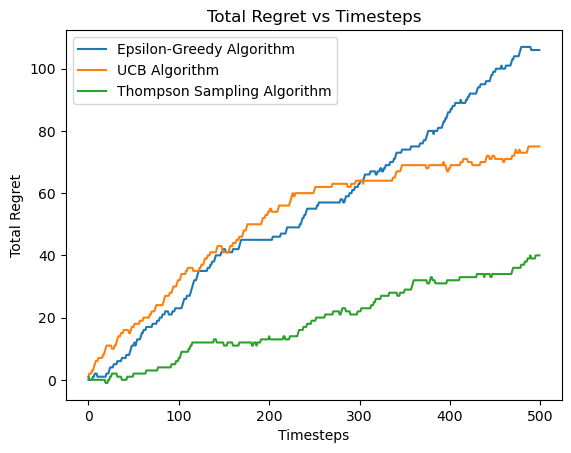

In [19]:
import numpy as np
import matplotlib.pyplot as plt

class Arm:
    def __init__(self, p):
        self.p = p

    def pull(self):
        return np.random.binomial(1, self.p)

class MultiBandit:
    def __init__(self, probs):
        self.__arms = [Arm(p) for p in probs]
        self.__maxp = max(probs)

    def num_arms(self):
        return len(self.__arms)

    def pull(self, arm_num):
        return self.__arms[arm_num].pull()

    def regret(self, arm_num):
        return self.__maxp - self.__arms[arm_num].p

class EpsilonGreedyAlgorithm:
    def __init__(self, num_arms, horizon, epsilon):
        self.num_arms = num_arms
        self.horizon = horizon
        self.epsilon = epsilon
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)
        self.cumulative_regret = 0  # Initializes the cumulative regret

    def give_best_arm(self):
        return np.argmax(self.arm_rewards / (self.arm_pulls + 1e-6))

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.num_arms)
        else:
            return np.argmax(self.arm_rewards / (self.arm_pulls + 1e-6))

    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            best_arm_reward = max([bandit.pull(arm) for arm in range(self.num_arms)])
            self.regrets[_] = best_arm_reward - reward
            self.cumulative_regret += self.regrets[_]  # Updates the cumulative regret which we initially had as 0
            self.timestep += 1

    def plot(self):
        plt.plot(np.cumsum(self.regrets), label='Epsilon-Greedy Algorithm')

class UCBBanditAlgorithm:
    def __init__(self, num_arms, horizon):
        self.num_arms = num_arms
        self.horizon = horizon
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)
        self.cumulative_regret = 0  # Initializes the cumulative regret

    def give_best_arm(self):
        return np.argmax(self.arm_rewards / (self.arm_pulls + 1e-6))

    def select_arm(self):
        if self.timestep < self.num_arms:
            return self.timestep  # This explores each armm once in the first 'num_arms' timesteps

        ucb_values = self.arm_rewards / (self.arm_pulls + 1e-6) + np.sqrt(2 * np.log(self.timestep) / (self.arm_pulls + 1e-6))
        return np.argmax(ucb_values)

    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            best_arm_reward = max([bandit.pull(arm) for arm in range(self.num_arms)])
            self.regrets[_] = best_arm_reward - reward
            self.cumulative_regret += self.regrets[_]  # Updates the cumulative regret which we initially had as 0
            self.timestep += 1

    def plot(self):
        plt.plot(np.cumsum(self.regrets), label='UCB Algorithm')

class ThompsonSamplingAlgorithm:
    def __init__(self, num_arms, horizon):
        self.num_arms = num_arms
        self.horizon = horizon
        self.timestep = 0
        self.arm_pulls = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)
        self.regrets = np.zeros(horizon)
        self.cumulative_regret = 0  # Initializes the cumulative regret

    def select_arm(self):
        sampled_means = np.random.beta(self.arm_rewards + 1, self.arm_pulls - self.arm_rewards + 1)
        return np.argmax(sampled_means)

    def run_algorithm(self, bandit):
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()
            reward = bandit.pull(arm_to_pull)
            self.arm_pulls[arm_to_pull] += 1
            self.arm_rewards[arm_to_pull] += reward
            best_arm_reward = max([bandit.pull(arm) for arm in range(self.num_arms)])
            self.regrets[_] = best_arm_reward - reward
            self.cumulative_regret += self.regrets[_]  # Updates the cumulative regret which we initially had as 0
            self.timestep += 1

    def plot(self):
        plt.plot(np.cumsum(self.regrets), label='Thompson Sampling Algorithm')

# Now let's proceed with creating a custom MultiBandit with adjustable probability values. Changing these prob values will result in observing a diff best arm bcz the "best arm" is the one with the highest true probability of success (highest expected reward). If you modify the probability values assigned to the arms, it will influence the algorithm's estimation of the arms' performance, 'potentially' leading to a different arm being perceived as the best.
custom_bandit_probs = [0.1, 0.4, 0.9, 0.3]
custom_bandit = MultiBandit(probs=custom_bandit_probs)

# Let's set the horizon size: (a changeable parameter)
H = 500

# Creating instances of all three algorithms: (you can change the epsilon value here)
epsilon_greedy_algorithm = EpsilonGreedyAlgorithm(num_arms=custom_bandit.num_arms(), horizon=H, epsilon=0.3)
ucb_algorithm = UCBBanditAlgorithm(num_arms=custom_bandit.num_arms(), horizon=H)
thompson_sampling_algorithm = ThompsonSamplingAlgorithm(num_arms=custom_bandit.num_arms(), horizon=H)

# Running all 3 algorithms on the custom bandit we created:
epsilon_greedy_algorithm.run_algorithm(custom_bandit)
ucb_algorithm.run_algorithm(custom_bandit)
thompson_sampling_algorithm.run_algorithm(custom_bandit)


print(f"Epsilon-Greedy Algorithm: Total Regret after {H} timesteps: {epsilon_greedy_algorithm.cumulative_regret} with assumed best arm {epsilon_greedy_algorithm.give_best_arm()}")
epsilon_greedy_algorithm.plot()

print(f"UCB Algorithm: Total Regret after {H} timesteps: {ucb_algorithm.cumulative_regret} with assumed best arm {ucb_algorithm.give_best_arm()}")
ucb_algorithm.plot()

# No 'give_best_arm' method assumed here bcz in the case of Thompson Sampling, you don't need a 'give_best_arm' method because it samples arms based on their posterior distributions.
print(f"Thompson Sampling Algorithm: Total Regret after {H} timesteps: {thompson_sampling_algorithm.cumulative_regret}")
thompson_sampling_algorithm.plot()

plt.xlabel('Timesteps')
plt.ylabel('Total Regret')
plt.title('Total Regret vs Timesteps')
plt.legend()
plt.show()
